<a href="https://colab.research.google.com/github/Ganeshkumbara/Pytorch-NeuralNetwork/blob/main/Pytorch_%7C_Neural_Network_%7C_Convolutional_NN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Pytorch

---



In [ ]:
!pip install torch torchvision
!pip install scikit-image

**Documentation** [link](https://pyimagesearch.com/2021/07/05/what-is-pytorch/)

In [ ]:
import torch
import numpy as np

In [ ]:
torch.__version__

'2.4.1+cu121'

**PyTorch represents multi-dimensional arrays as “tensors.” Tensors form the fundamental building blocks of a neural network**

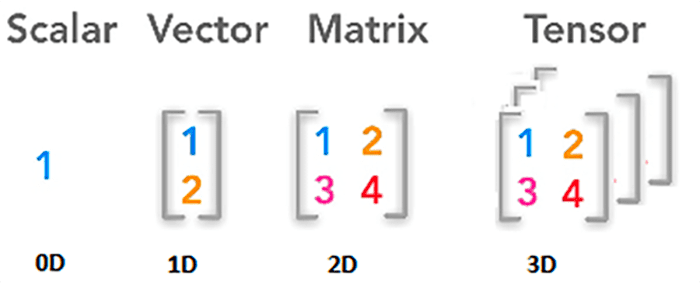

- If you have a 1D array like np.array([1, 2, 3]), np.shape will return (3,), indicating it has 3 elements.
- For a 2D array like np.array([[1, 2], [3, 4]]), it will return (2, 2), indicating it has 2 rows and 2 columns.
- For a 3D array like np.array([[[1], [2]], [[3], [4]]]), it will return (2, 2, 1), indicating it has 2 blocks, each containing 2 rows and 1 column.

In [ ]:
image_blank = np.random.rand(2, 3, 4) # height, width, channel

In [ ]:
image_blank

array([[[0.84380854, 0.04514342, 0.15391467, 0.51177793],
        [0.50704623, 0.63259954, 0.3587514 , 0.29681193],
        [0.12397724, 0.98565075, 0.32657167, 0.18893286]],

       [[0.42915268, 0.13598396, 0.5706603 , 0.64200289],
        [0.163271  , 0.58596254, 0.06212834, 0.53319516],
        [0.34659961, 0.38589708, 0.92336329, 0.76301917]]])

- image[:, :, 0] accesses all rows and columns of the first channel (red).
- image[:, :, 1] accesses all rows and columns of the second channel (green).
- image[:, :, 2] accesses all rows and columns of the third channel (blue).
- image[:, :, 3] accesses all rows and columns of the fourth channel (alpha).

In [ ]:
image_blank[:,:,0]

array([[0.84380854, 0.50704623, 0.12397724],
       [0.42915268, 0.163271  , 0.34659961]])

In [ ]:
np_array = np.array([[0.0, 1.3], [2.8, 3.3], [4.1, 5.2], [6.9, 7.0]])

In [ ]:
np_array.shape

(4, 2)

In [ ]:
pyt_array = torch.tensor([[0.0, 1.3], [2.8, 3.3], [4.1, 5.2], [6.9, 7.0]])

In [ ]:
pyt_array.shape

torch.Size([4, 2])

# Neural Network

---



- Defining your neural network architecture
- Initializing your optimizer and loss function
- Looping over your number of training epochs
-Looping over data batches inside each epoch
-Making predictions and computing the loss on the current batch of data
-Zeroing out your gradient
-Performing backpropagation
-Telling your optimizer to update the gradients of your network
-Telling PyTorch to train your network with a GPU (if a GPU is available on your machine, of course)




# Multilayer Preceptron (MLP)

A Multilayer Perceptron (MLP) is a type of artificial neural network that consists of multiple layers of nodes (neurons). Here's a breakdown of its key features:
- Architecture: MLPs have an input layer, one or more hidden layers, and an output layer. Each layer is fully connected to the next one, meaning every neuron in one layer is connected to every neuron in the following layer.
- Activation Functions: Neurons in MLPs use activation functions (like ReLU, sigmoid, or tanh) to introduce non-linearity into the model, allowing it to learn complex patterns.
- Feedforward Process: Data flows in one direction—from the input layer through the hidden layers to the output layer—without any cycles or loops.
- Backpropagation: MLPs are trained using a method called backpropagation, which adjusts the weights of connections based on the error of the output compared to the expected result.
- Applications: MLPs are used for various tasks, including classification, regression, and function approximation in fields like image recognition, natural language processing, and more.

In [ ]:
from collections import OrderedDict
import torch.nn as nn

def get_training_model(inFeatures=4, hiddenDim=8, nbClasses=3):
    """
    nn.Sequential : Is a container module that allows you to build neural networks in a sequential manner.
    nn.linear : Perform linear transformation y = Wx+b W-wieght,x-input feature, b-bias  example (intput : 10 X 1) * (weight10 X 5 ) + bias
    """
    # construct a shallow, sequential neural network
    mlpModel = nn.Sequential(OrderedDict([
      ("hidden_layer_1", nn.Linear(inFeatures, hiddenDim)),
      ("activation_1", nn.ReLU()),
      ("output_layer", nn.Linear(hiddenDim, nbClasses))
    ]))
    # return the sequential model
    return mlpModel

Tensor Linear Transformation Example

In [ ]:
# Define a linear layer with 10 input features and 5 output features
linear_layer = nn.Linear(10, 5)

print(linear_layer)
# Create a random input tensor with shape (batch_size, input_features)
input_tensor = torch.randn(3, 10)  # Batch size of 3

print(input_tensor)
# Pass the input through the linear layer
output_tensor = linear_layer(input_tensor)

print(output_tensor)


Linear(in_features=10, out_features=5, bias=True)
tensor([[ 0.3201, -0.8294, -1.5710, -0.1986,  1.2200,  1.2368,  0.1443, -0.7095,
         -1.0461,  0.2926],
        [ 1.1299,  1.2447, -0.9054,  0.5745,  0.2229, -0.3718, -1.1537, -0.4561,
         -0.4596,  1.0956],
        [ 0.5246, -0.7403,  0.0140,  0.1679, -0.2601,  0.3617, -0.1666, -2.1362,
         -0.8157,  0.2303]])
tensor([[-7.3894e-01, -6.8627e-01, -4.2014e-01, -7.7384e-01,  8.1890e-01],
        [ 1.0162e-01, -3.1430e-01, -1.1365e-01,  8.4688e-02,  4.2357e-01],
        [-2.3596e-01, -8.0991e-02, -4.7311e-02,  5.4219e-04,  4.8143e-01]],
       grad_fn=<AddmmBackward0>)


# Training MLP Neural Network

In [ ]:
from torch.optim import SGD # SGD: The Stochastic Gradient Descent optimizer that we’ll be using to train our model
from sklearn.model_selection import train_test_split #train_test_split: Splits our dataset into a training and testing split
from sklearn.datasets import make_blobs #make_blobs: Builds a synthetic dataset of example data
import torch.nn as nn #nn: PyTorch’s neural network functionality
import torch # torch: The base PyTorch library

In [ ]:
def next_batch(inputs, targets, batchSize):
	# loop over the dataset
	for i in range(0, inputs.shape[0], batchSize):
		# yield a tuple of the current batched data and labels
		yield (inputs[i:i + batchSize], targets[i:i + batchSize])

In [ ]:
BATCH_SIZE = 64
EPOCHS = 10
LR = 1e-2 # 0.01
# determine the device we will be using for training
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("[INFO] training using {}...".format(DEVICE))

[INFO] training using cpu...


In [ ]:
# generate a 3-class classification problem with 1000 data points,
# where each data point is a 4D feature vector
print("[INFO] preparing data...")
(X, y) = make_blobs(n_samples=1000, n_features=4, centers=3,
	cluster_std=1, random_state=95)
#X = [1,2,3,4] point feature
#y = shape(1000, 4) 3 class features [1,2,0 .......]

# create training and testing splits, and convert them to PyTorch
# tensors
(trainX, testX, trainY, testY) = train_test_split(X, y,
	test_size=0.15, random_state=95)
trainX = torch.from_numpy(trainX).float()
testX = torch.from_numpy(testX).float()
trainY = torch.from_numpy(trainY).float()
testY = torch.from_numpy(testY).float()

[INFO] preparing data...


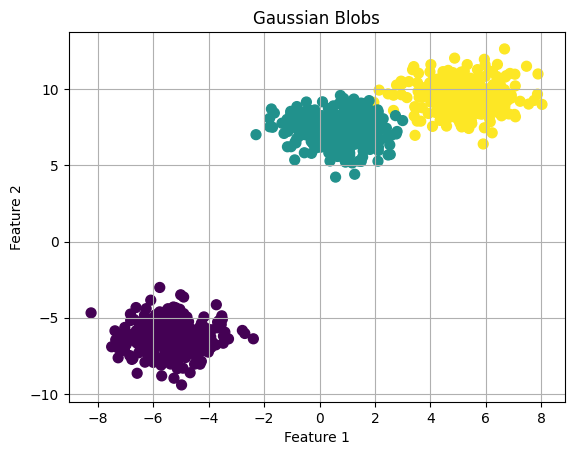

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Create a scatter plot
plt.scatter(trainX[:, 0], trainX[:, 1], c=trainY, s=50, cmap='viridis')
plt.title('Gaussian Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [ ]:
# initialize our model and display its architecture
mlp = get_training_model().to(DEVICE)
print(mlp)
# initialize optimizer and loss function
opt = SGD(mlp.parameters(), lr=LR) #lr = learning rate adjusted during Gradient Descent process
lossFunc = nn.CrossEntropyLoss() #The standard loss method you’ll use when performing classification with > 2 classes.

Sequential(
  (hidden_layer_1): Linear(in_features=4, out_features=8, bias=True)
  (activation_1): ReLU()
  (output_layer): Linear(in_features=8, out_features=3, bias=True)
)


#Training Part

In [ ]:
# create a template to summarize current training progress
trainTemplate = "epoch: {} test loss: {:.3f} test accuracy: {:.3f}"
# loop through the epochs
for epoch in range(0, EPOCHS):
    # initialize tracker variables and set our model to trainable
    print("[INFO] epoch: {}...".format(epoch + 1))
    trainLoss = 0
    trainAcc = 0
    samples = 0
    mlp.train()
    # loop over the current batch of data
    for (batchX, batchY) in next_batch(trainX, trainY, BATCH_SIZE):
      # flash data to the current device, run it through our
      # model, and calculate loss
      (batchX, batchY) = (batchX.to(DEVICE), batchY.to(DEVICE))
      predictions = mlp(batchX)
      loss = lossFunc(predictions, batchY.long())
      # zero the gradients accumulated from the previous steps,
      # perform backpropagation, and update model parameters
      opt.zero_grad()
      loss.backward()
      opt.step()
      # update training loss, accuracy, and the number of samples
      # visited
      trainLoss += loss.item() * batchY.size(0)
      trainAcc += (predictions.max(1)[1] == batchY).sum().item()
      samples += batchY.size(0)

    # display model progress on the current training batch
    trainTemplate = "epoch: {} train loss: {:.3f} train accuracy: {:.3f}"
    print(trainTemplate.format(epoch + 1, (trainLoss / samples),
      (trainAcc / samples)))

    # initialize tracker variables for testing, then set our model to
    # evaluation mode
    testLoss = 0
    testAcc = 0
    samples = 0

    mlp.eval()
    # initialize a no-gradient context
    with torch.no_grad():
      # loop over the current batch of test data
      for (batchX, batchY) in next_batch(testX, testY, BATCH_SIZE):
        # flash the data to the current device
        (batchX, batchY) = (batchX.to(DEVICE), batchY.to(DEVICE))
        # run data through our model and calculate loss
        predictions = mlp(batchX)
        loss = lossFunc(predictions, batchY.long())
        # update test loss, accuracy, and the number of
        # samples visited
        testLoss += loss.item() * batchY.size(0)
        testAcc += (predictions.max(1)[1] == batchY).sum().item()
        samples += batchY.size(0)
      # display model progress on the current test batch
      testTemplate = "epoch: {} test loss: {:.3f} test accuracy: {:.3f}"
      print(testTemplate.format(epoch + 1, (testLoss / samples),
        (testAcc / samples)))
      print("")

[INFO] epoch: 1...
epoch: 1 train loss: 0.576 train accuracy: 0.818
epoch: 1 test loss: 0.493 test accuracy: 0.993

[INFO] epoch: 2...
epoch: 2 train loss: 0.404 train accuracy: 0.995
epoch: 2 test loss: 0.365 test accuracy: 1.000

[INFO] epoch: 3...
epoch: 3 train loss: 0.294 train accuracy: 0.999
epoch: 3 test loss: 0.257 test accuracy: 1.000

[INFO] epoch: 4...
epoch: 4 train loss: 0.206 train accuracy: 1.000
epoch: 4 test loss: 0.174 test accuracy: 1.000

[INFO] epoch: 5...
epoch: 5 train loss: 0.145 train accuracy: 1.000
epoch: 5 test loss: 0.122 test accuracy: 1.000

[INFO] epoch: 6...
epoch: 6 train loss: 0.106 train accuracy: 1.000
epoch: 6 test loss: 0.091 test accuracy: 1.000

[INFO] epoch: 7...
epoch: 7 train loss: 0.081 train accuracy: 1.000
epoch: 7 test loss: 0.071 test accuracy: 1.000

[INFO] epoch: 8...
epoch: 8 train loss: 0.065 train accuracy: 1.000
epoch: 8 test loss: 0.057 test accuracy: 1.000

[INFO] epoch: 9...
epoch: 9 train loss: 0.054 train accuracy: 1.000
epoc

## Pytorch Training simple neural network github [link](https://github.com/PacktPublishing/Deep-learning-with-PyTorch-video/blob/master/2.training.your.first.neural.network.ipynb)

In [ ]:
# Saving model to local machine
torch.save(mlp.state_dict(), 'mlp.pth')

In [ ]:
# Load the model for inference

inFeatures, hiddenDim, nbClasses = 4, 8, 3
loaded_model = nn.Sequential(OrderedDict([
    ("hidden_layer_1", nn.Linear(inFeatures, hiddenDim)),
    ("activation_1", nn.ReLU()),
    ("output_layer", nn.Linear(hiddenDim, nbClasses))
]))


loaded_model.load_state_dict(torch.load('mlp.pth'))
loaded_model.eval()

<ipython-input-21-c786300ab52b>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('mlp.pth'))


Sequential(
  (hidden_layer_1): Linear(in_features=4, out_features=8, bias=True)
  (activation_1): ReLU()
  (output_layer): Linear(in_features=8, out_features=3, bias=True)
)

In [ ]:
import torch.nn.functional as F
def inference(x):
    with torch.no_grad():  # Disable gradient calculation for inference
        prediction_logits = loaded_model(x)  # Get raw scores
        prediction_probs = F.softmax(prediction_logits, dim=0)  # Apply softmax to get probabilities
        predicted_class = torch.argmax(prediction_probs).item()
    return predicted_class

In [ ]:
index_value = 46
print("Inference Output:",inference(testX[index_value]))
print("Train Data index value:",testY[index_value])

Inference Output: 2
Train Data index value: tensor(2.)




--------------------------------------------------------------------------------


## Training a Convolutional Neural Network (CNN)
  * Define our model architecture
  * Load our dataset from disk
  * Loop over our epochs and batches
  * Make predictions and compute our loss
  * Properly zero our gradient, perform backpropagation, and update our model parameters

  ## LeNet Architecture
  In the late 1990s, Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner created a convolutional neural network (CNN) based architecture called LeNet.

  LeNet-5 is a convolutional neural network (CNN) architecture that introduced several key features and innovations that have become standard in modern deep learning. It demonstrated the effectiveness of CNNs for image recognition tasks and introduced key concepts such as **convolution, pooling,** and **hierarchical feature extraction** that underpin modern deep learning models.

In [ ]:
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten

In [ ]:
class LeNet(Module):
    def __init__(self, numChannels, classes):
      # call the parent constructor
      super(LeNet, self).__init__()
      # initialize first set of CONV => RELU => POOL layers
      self.conv1 = Conv2d(in_channels=numChannels, out_channels=20, kernel_size=(5, 5))
      self.relu1 = ReLU()
      self.maxpool1 = MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
      # initialize second set of CONV => RELU => POOL layers
      self.conv2 = Conv2d(in_channels=20, out_channels=50, kernel_size=(5, 5))
      self.relu2 = ReLU()
      self.maxpool2 = MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
      # initialize first (and only) set of FC => RELU layers
      self.fc1 = Linear(in_features=800, out_features=500)
      self.relu3 = ReLU()
      # initialize our softmax classifier
      self.fc2 = Linear(in_features=500, out_features=classes)
      self.logSoftmax = LogSoftmax(dim=1)

    def forward(self, x):
      # pass the input through our first set of CONV => RELU =>
      # POOL layers
      x = self.conv1(x)
      x = self.relu1(x)
      x = self.maxpool1(x)
      # pass the output from the previous layer through the second
      # set of CONV => RELU => POOL layers
      x = self.conv2(x)
      x = self.relu2(x)
      x = self.maxpool2(x)
      # flatten the output from the previous layer and pass it
      # through our only set of FC => RELU layers
      x = flatten(x, 1)
      x = self.fc1(x)
      x = self.relu3(x)
      # pass the output to our softmax classifier to get our output
      # predictions
      x = self.fc2(x)
      output = self.logSoftmax(x)
      # return the output predictions
      return output


# Traning Convolutional Neural Network

In [ ]:
import matplotlib
matplotlib.use("Agg")
# import the necessary packages
from sklearn.metrics import classification_report
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.datasets import KMNIST
from torch.optim import Adam
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import argparse
import torch
import time

In [ ]:
# define training hyperparameters
INIT_LR = 1e-3
BATCH_SIZE = 64
EPOCHS = 10
# define the train and val splits
TRAIN_SPLIT = 0.75
VAL_SPLIT = 1 - TRAIN_SPLIT
# set the device we will be using to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# load the KMNIST dataset
print("[INFO] loading the KMNIST dataset...")
trainData = KMNIST(root="data", train=True, download=True,
	transform=ToTensor())
testData = KMNIST(root="data", train=False, download=True,
	transform=ToTensor())
# calculate the train/validation split
print("[INFO] generating the train/validation split...")
numTrainSamples = int(len(trainData) * TRAIN_SPLIT)
numValSamples = int(len(trainData) * VAL_SPLIT)
(trainData, valData) = random_split(trainData,
	[numTrainSamples, numValSamples],
	generator=torch.Generator().manual_seed(42))

[INFO] loading the KMNIST dataset...


100%|██████████| 18165135/18165135 [00:14<00:00, 1289387.44it/s]


Extracting data/KMNIST/raw/train-images-idx3-ubyte.gz to data/KMNIST/raw



100%|██████████| 29497/29497 [00:00<00:00, 186220.33it/s]


Extracting data/KMNIST/raw/train-labels-idx1-ubyte.gz to data/KMNIST/raw



100%|██████████| 3041136/3041136 [00:02<00:00, 1360557.27it/s]


Extracting data/KMNIST/raw/t10k-images-idx3-ubyte.gz to data/KMNIST/raw



100%|██████████| 5120/5120 [00:00<00:00, 5060046.30it/s]

Extracting data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to data/KMNIST/raw

[INFO] generating the train/validation split...


In [ ]:
# initialize the train, validation, and test data loaders
trainDataLoader = DataLoader(trainData, shuffle=True,
	batch_size=BATCH_SIZE)
valDataLoader = DataLoader(valData, batch_size=BATCH_SIZE)
testDataLoader = DataLoader(testData, batch_size=BATCH_SIZE)
# calculate steps per epoch for training and validation set
trainSteps = len(trainDataLoader.dataset) // BATCH_SIZE
valSteps = len(valDataLoader.dataset) // BATCH_SIZE

In [ ]:
# initialize the LeNet model
print("[INFO] initializing the LeNet model...")
model = LeNet(
	numChannels=1,
	classes=len(trainData.dataset.classes)).to(device)
# initialize our optimizer and loss function
opt = Adam(model.parameters(), lr=INIT_LR)
lossFn = nn.NLLLoss()
# initialize a dictionary to store training history
H = {
	"train_loss": [],
	"train_acc": [],
	"val_loss": [],
	"val_acc": []
}
# measure how long training is going to take
print("[INFO] training the network...")
startTime = time.time()

[INFO] initializing the LeNet model...
[INFO] training the network...


In [ ]:
# loop over our epochs
for e in range(0, EPOCHS):
	# set the model in training mode
	model.train()
	# initialize the total training and validation loss
	totalTrainLoss = 0
	totalValLoss = 0
	# initialize the number of correct predictions in the training
	# and validation step
	trainCorrect = 0
	valCorrect = 0
	# loop over the training set
	for (x, y) in trainDataLoader:
		# send the input to the device
		(x, y) = (x.to(device), y.to(device))
		# perform a forward pass and calculate the training loss
		pred = model(x)
		loss = lossFn(pred, y)
		# zero out the gradients, perform the backpropagation step,
		# and update the weights
		opt.zero_grad()
		loss.backward()
		opt.step()
		# add the loss to the total training loss so far and
		# calculate the number of correct predictions
		totalTrainLoss += loss
		trainCorrect += (pred.argmax(1) == y).type(
			torch.float).sum().item()

   # switch off autograd for evaluation
	with torch.no_grad():
		# set the model in evaluation mode
		model.eval()
		# loop over the validation set
		for (x, y) in valDataLoader:
			# send the input to the device
			(x, y) = (x.to(device), y.to(device))
			# make the predictions and calculate the validation loss
			pred = model(x)
			totalValLoss += lossFn(pred, y)
			# calculate the number of correct predictions
			valCorrect += (pred.argmax(1) == y).type(
				torch.float).sum().item()

	# calculate the average training and validation loss
	avgTrainLoss = totalTrainLoss / trainSteps
	avgValLoss = totalValLoss / valSteps
	# calculate the training and validation accuracy
	trainCorrect = trainCorrect / len(trainDataLoader.dataset)
	valCorrect = valCorrect / len(valDataLoader.dataset)
	# update our training history
	H["train_loss"].append(avgTrainLoss.cpu().detach().numpy())
	H["train_acc"].append(trainCorrect)
	H["val_loss"].append(avgValLoss.cpu().detach().numpy())
	H["val_acc"].append(valCorrect)
	# print the model training and validation information
	print("[INFO] EPOCH: {}/{}".format(e + 1, EPOCHS))
	print("Train loss: {:.6f}, Train accuracy: {:.4f}".format(
		avgTrainLoss, trainCorrect))
	print("Val loss: {:.6f}, Val accuracy: {:.4f}\n".format(
		avgValLoss, valCorrect))

# finish measuring how long training took
endTime = time.time()
print("[INFO] total time taken to train the model: {:.2f}s".format(
	endTime - startTime))
# we can now evaluate the network on the test set
print("[INFO] evaluating network...")
# turn off autograd for testing evaluation
with torch.no_grad():
	# set the model in evaluation mode
	model.eval()

	# initialize a list to store our predictions
	preds = []
	# loop over the test set
	for (x, y) in testDataLoader:
		# send the input to the device
		x = x.to(device)
		# make the predictions and add them to the list
		pred = model(x)
		preds.extend(pred.argmax(axis=1).cpu().numpy())
# generate a classification report
print(classification_report(testData.targets.cpu().numpy(),
	np.array(preds), target_names=testData.classes))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_loss"], label="train_loss")
plt.plot(H["val_loss"], label="val_loss")
plt.plot(H["train_acc"], label="train_acc")
plt.plot(H["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")
# serialize the model to disk
torch.save(model, "model.pth")

[INFO] EPOCH: 1/10
Train loss: 0.359286, Train accuracy: 0.8890
Val loss: 0.142820, Val accuracy: 0.9591

[INFO] EPOCH: 2/10
Train loss: 0.097339, Train accuracy: 0.9708
Val loss: 0.083454, Val accuracy: 0.9761

[INFO] EPOCH: 3/10
Train loss: 0.057584, Train accuracy: 0.9821
Val loss: 0.075841, Val accuracy: 0.9779

[INFO] EPOCH: 4/10
Train loss: 0.036950, Train accuracy: 0.9889
Val loss: 0.070041, Val accuracy: 0.9805

[INFO] EPOCH: 5/10
Train loss: 0.026294, Train accuracy: 0.9919
Val loss: 0.070891, Val accuracy: 0.9817

[INFO] EPOCH: 6/10
Train loss: 0.019169, Train accuracy: 0.9939
Val loss: 0.087471, Val accuracy: 0.9781

[INFO] EPOCH: 7/10
Train loss: 0.014054, Train accuracy: 0.9952
Val loss: 0.085440, Val accuracy: 0.9798

[INFO] EPOCH: 8/10
Train loss: 0.014519, Train accuracy: 0.9953
Val loss: 0.082861, Val accuracy: 0.9801

[INFO] EPOCH: 9/10
Train loss: 0.010474, Train accuracy: 0.9969
Val loss: 0.085427, Val accuracy: 0.9813

[INFO] EPOCH: 10/10
Train loss: 0.008842, Trai

## Inference

In [ ]:
from torch.utils.data import Subset
import matplotlib.pyplot as plt
import imutils
import cv2


In [ ]:
np.random.seed(42)
# set the device we will be using to test the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# load the KMNIST dataset and randomly grab 10 data points
print("[INFO] loading the KMNIST test dataset...")
testData = KMNIST(root="data", train=False, download=True,
	transform=ToTensor())
idxs = np.random.choice(range(0, len(testData)), size=(10,))
testData = Subset(testData, idxs)
# initialize the test data loader
testDataLoader = DataLoader(testData, batch_size=1)
# load the model and set it to evaluation mode
model = torch.load("model.pth").to(device)
model.eval()

[INFO] loading the KMNIST test dataset...


<ipython-input-57-79d2ad32b838>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("model.pth").to(device)


LeNet(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (logSoftmax): LogSoftmax(dim=1)
)

In [ ]:
import string
import random
res = ''.join(random.choices(string.ascii_letters,
                             k=7), )
# switch off autograd
with torch.no_grad():
    # loop over the test set
    for (image, label) in testDataLoader:
      # grab the original image and ground truth label
      origImage = image.numpy().squeeze(axis=(0, 1))
      gtLabel = testData.dataset.classes[label.numpy()[0]]
      # send the input to the device and make predictions on it
      image = image.to(device)
      pred = model(image)
      # find the class label index with the largest corresponding
      # probability
      idx = pred.argmax(axis=1).cpu().numpy()[0]
      predLabel = testData.dataset.classes[idx]

      # convert the image from grayscale to RGB (so we can draw on
      # it) and resize it (so we can more easily see it on our
      # screen)
      origImage = np.dstack([origImage] * 3)
      origImage = imutils.resize(origImage, width=128)
      # draw the predicted class label on it
      color = (0, 255, 0) if gtLabel == predLabel else (0, 0, 255)
      cv2.putText(origImage, gtLabel, (2, 25),cv2.FONT_HERSHEY_SIMPLEX, 0.95, color, 2)
      # display the result in terminal and show the input image
      print("[INFO] ground truth label: {}, predicted label: {}".format(gtLabel, predLabel))
      # cv2.imshow("image", origImage)
		  # cv2.waitKey(0)
      # plt.imshow(origImage)
      # plt.axis('off')
      # plt.show()

[INFO] ground truth label: ki, predicted label: ki
[INFO] ground truth label: ki, predicted label: ki
[INFO] ground truth label: ki, predicted label: ki
[INFO] ground truth label: ha, predicted label: ha
[INFO] ground truth label: tsu, predicted label: tsu
[INFO] ground truth label: ya, predicted label: ya
[INFO] ground truth label: tsu, predicted label: tsu
[INFO] ground truth label: na, predicted label: na
[INFO] ground truth label: ki, predicted label: ki
[INFO] ground truth label: tsu, predicted label: tsu
